In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)      # Display all columns when printing
data = pd.read_csv("/data1/yujiehe/data/313-samples-lightcone0.csv")
data

,id,redshift,theta_on_lc,phi_on_lc,M_fof_lc,x_lc,y_lc,z_lc,M_fof_soap,M500,GasMass,LX0InRestframeWithoutRecentAGNHeating,LX0InRestframeWithoutRecentAGNHeatingCoreExcision,TCoreExcisionWithoutRecentAGNHeating,Y5R500WithoutRecentAGNHeating,Vx,Vy,Vz,redshift_obs,flux
0,12091858,0.008946,-31.531823,175.283950,1.149773e+14,-33.253284,2.743296,-20.472364,1.150364e+14,6.926923e+13,5.987184e+12,1.422780e+43,1.134407e+43,1.417510,2.844216e+43,-576.22020,621.679750,-234.120180,0.011155,8.751977e-11
1,11680982,0.009828,-70.463963,-155.767624,1.816235e+14,-12.920283,-5.815383,-39.931373,1.816943e+14,1.055531e+14,1.018766e+13,2.635089e+43,1.996408e+43,1.917310,5.540341e+43,-224.36414,217.435790,-231.364140,0.010693,1.366926e-10
2,12785727,0.012801,35.673757,173.609693,4.176649e+13,-45.398598,5.084492,32.794442,4.178144e+13,2.700675e+13,1.215476e+12,1.758244e+42,1.435943e+42,0.906416,4.682285e+42,132.37756,522.077640,357.177600,0.013304,5.305177e-12
3,12091874,0.013246,-32.788106,165.903051,1.000806e+14,-47.634705,11.962315,-31.637235,1.000556e+14,6.329064e+13,5.428839e+12,1.308443e+43,1.071877e+43,1.318680,2.234430e+43,-201.12018,491.279850,332.079770,0.013532,3.613950e-11
4,12396676,0.014064,63.003220,179.869802,1.141092e+14,-27.990255,0.063605,54.941745,1.140743e+14,5.394479e+13,3.367254e+12,6.756118e+42,5.304649e+42,1.344094,2.269275e+43,-210.91003,220.789980,737.589900,0.016615,1.662307e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,7056799,0.237693,53.242041,52.137610,1.565686e+15,362.097009,465.764509,789.821129,1.565705e+15,9.928590e+14,1.241074e+14,8.130470e+44,5.234082e+44,7.217444,2.294189e+45,351.32666,-117.773315,-55.473328,0.237813,5.757048e-12
309,13525957,0.243925,-79.571767,-59.791577,1.643974e+15,92.076453,-158.149707,-994.334797,1.644869e+15,9.840629e+14,1.250694e+14,8.211647e+44,6.662006e+44,6.889892,2.227287e+45,-124.93082,-85.530820,-480.130800,0.245894,5.458297e-12
310,11514444,0.253478,-69.425818,-36.455214,1.512787e+15,296.221364,-218.834156,-981.154466,1.512928e+15,1.089616e+15,1.404626e+14,9.200111e+44,7.374242e+44,6.968956,2.575736e+45,102.68030,454.680300,100.880370,0.252807,5.648223e-12
311,10132384,0.259387,-49.538665,-76.554212,1.662498e+14,161.799804,-676.764966,-815.835356,1.663011e+14,1.050034e+14,9.156870e+12,1.496051e+45,2.389914e+43,1.846717,5.157047e+43,-86.80615,154.793820,-158.806150,0.259429,8.156733e-12


In [16]:
# Make a namespace for our descriptive yet horribly long column names
class Columns: 
    LX     = "LX0InRestframeWithoutRecentAGNHeating"
    T      = "TCoreExcisionWithoutRecentAGNHeating"
    Ysz    = "Y5R500WithoutRecentAGNHeating"

In [17]:
# change Unit for Ysz to kpc^2
data[Columns.Ysz] /= (64800 / np.pi * 149_597_870_700 * 100 * 1000)**2

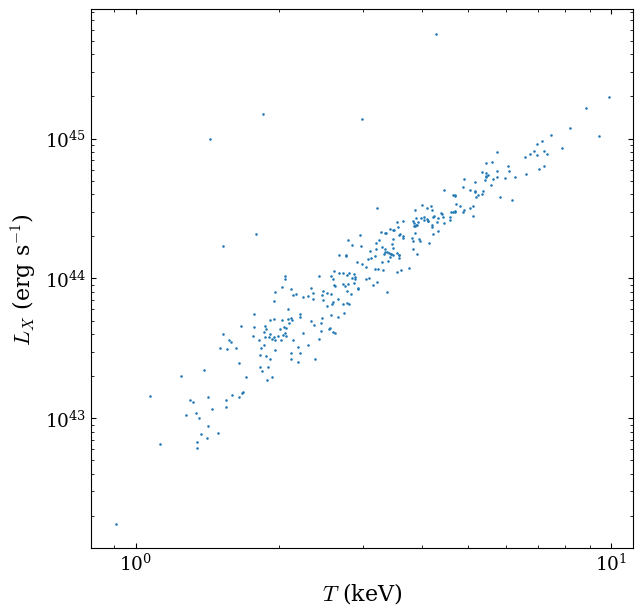

In [62]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(data[Columns.T], data[Columns.LX], s=0.7)
ax.set(xlabel='$T$ (keV)', ylabel='$L_X$ (erg s$^{-1}$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()
# overplot with after Lcore/Ltot fraction selection
# T? Chandra temperature?

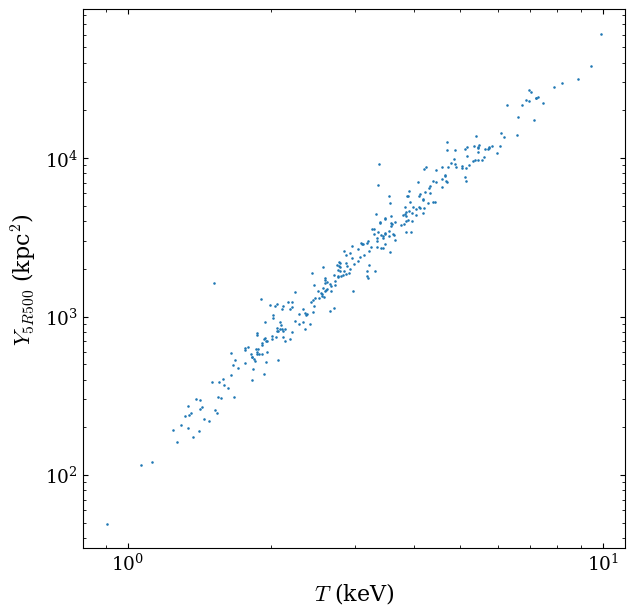

In [13]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(data[Columns.T], data[Columns.Ysz], s=0.7)
ax.set(xlabel='$T$ (keV)', ylabel='$Y_{{sz}}$ (kpc$^2$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

Minimize $\chi^2$!
$$
\chi^2 = \sum_i\frac{(\log L'_{X,i} - \log \tilde{L}'_{X,i}(T_i'))^2}
{\sigma_{\log L'_{X,i}}^2
 + \sigma_{\log \tilde{L}'_{X,i}}^2
 + \sigma_{\mathrm{int}}^2}
$$
$$
L_X' = \frac{L_X}{10^{44}\, \mathrm{erg\,s^{-1}}} E(z)^{-1} \quad
E(z) = [\Omega_m (1+z)^3 + \Omega_\Lambda]^{1/2}
$$
$$
T' = \frac{T}{4\,\mathrm{keV}}
$$
First we ignore observational scatters. We can always add them later.

In [64]:
import numpy as np
def _logLX_(data):
    Omega_m = 0.3
    Omega_L = 0.7

    Ez = (Omega_m * (1 + data["redshift_obs"])**3 + Omega_L)**0.5
    logLX_ = np.log10(data[Columns.LX] / 1e44 * Ez**-1)
    logLX_ = np.array(logLX_, dtype=np.float64)

    return logLX_

def _logT_(data):
    logT_  = np.log10(data[Columns.T] / 4)
    logT_  = np.array(logT_, dtype=np.float64)
    return logT_

In [65]:
# Initialize LX', T'
import numpy as np

Omega_m = 0.3
Omega_L = 0.7

Ez = (Omega_m * (1 + data["redshift_obs"])**3 + Omega_L)**0.5
logLX_ = np.log10(data[Columns.LX] / 1e44 * Ez**-1)
logT_  = np.log10(data[Columns.T] / 4)

logLX_ = np.array(logLX_, dtype=np.float64)
logT_  = np.array(logT_, dtype=np.float64)

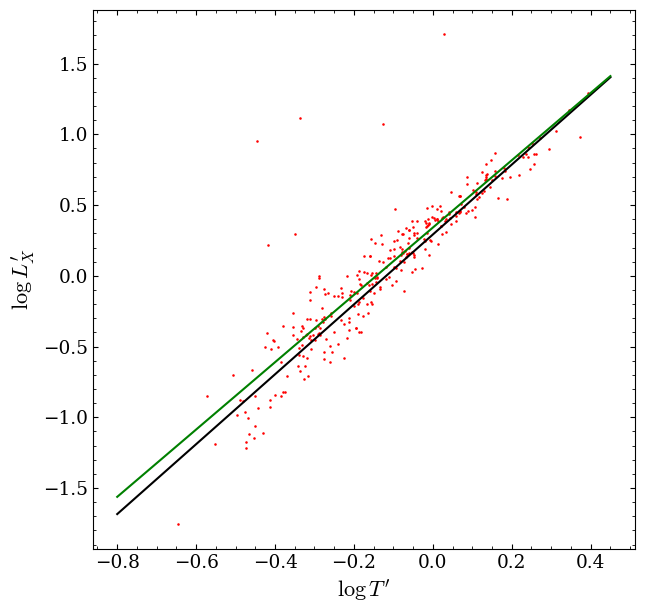

In [66]:
# Set our parameter space with this plot
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(logT_, logLX_, s=0.7, color='red')
ax.set(xlabel='$\\log T\'$', ylabel='$\\log L_X\'$')

x = np.linspace(-0.8, 0.45, 100)
ax.plot(x, 0.292 + 2.470 * x, color='black')
ax.plot(x, 0.341 + 2.379 * x, color='green')
plt.show()

In [18]:
from numba import jit

@jit(nopython=True)
def fit(logLX_, logT_):
    Nclusters = len(logLX_)
    minx2 = 1e8
    for intr_scat in np.arange(0.1, 2, 0.005):
        for B in np.arange(1.5, 3.5, 0.001):
            for logA in np.arange(-0.1, 1, 0.001):
                x2 = np.sum((logLX_ - logA - B * logT_)**2 / intr_scat**2) / (Nclusters - 3)
                if x2 < minx2:
                    minx2 = x2
                    params = {
                        'logA'     : logA,
                        'B'        : B,
                        'intr_scat': intr_scat,
                        'chi2'     : minx2
                    }

        if minx2 < 1.04: # K used 1.04 # end if found reduced x2 close to 1
            return params
    
    # Return our best fit, even if we didn't have a good match with x2 < 1.04
    return params


In [68]:
params = fit(logLX_, logT_)
print(params)

{logA: 0.34099999999999997, B: 2.379, intr_scat: 0.225, chi2: 1.0207425911412593}


In [69]:
A = 10 ** params['logA']
B = params['B']
intr_scat = params['intr_scat']
TSpace = np.linspace(np.min(data[Columns.T]), np.max(data[Columns.T]), 100)
LX_predicted = A * (TSpace/4)**B

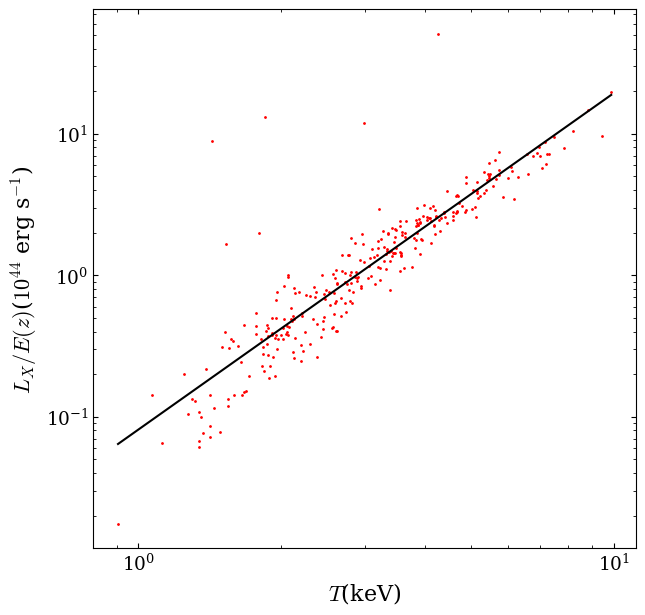

In [70]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data[Columns.T], 10**logLX_, s=1, color='r')
ax.plot(TSpace, LX_predicted, color='black')
ax.set(xlabel='$T$(keV)', ylabel='$L_X/E(z)$($10^{{44}}$ erg s$^{-1}$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

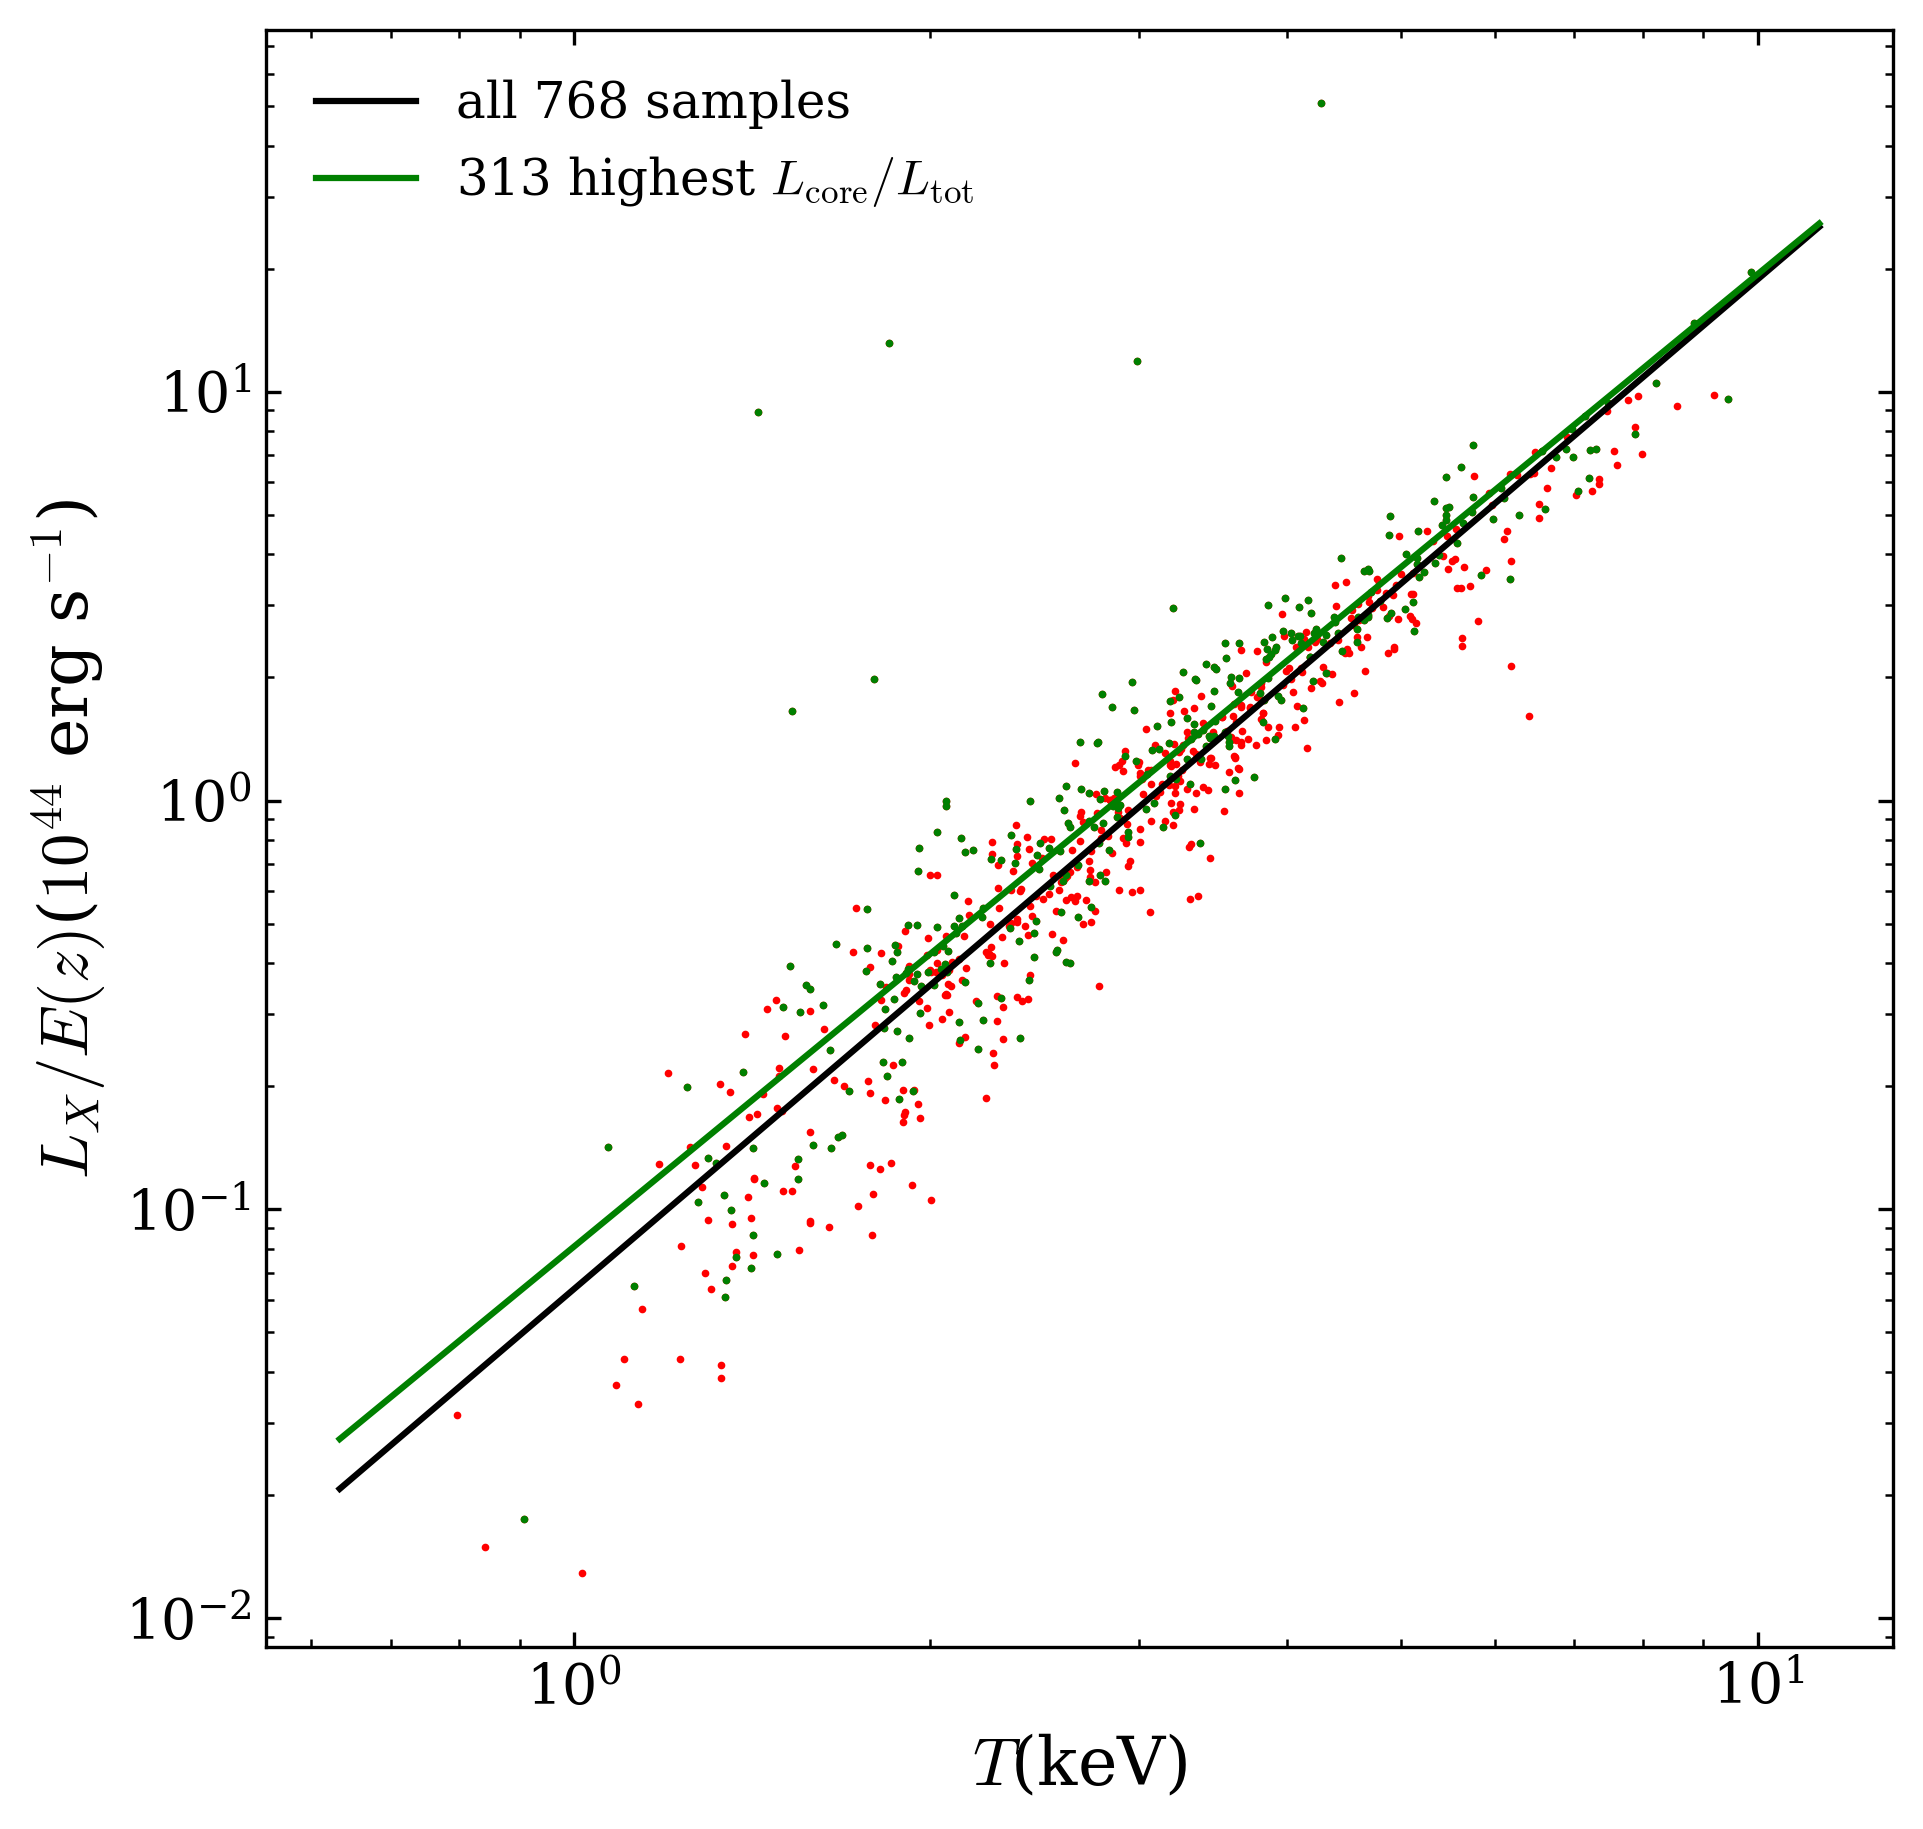

In [82]:
# Compare 
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')
fig, ax = plt.subplots(figsize=(7,7), dpi=300)
data = pd.read_csv("/data1/yujiehe/data/samples-lightcone0.csv")
ax.scatter(data[Columns.T], 10**_logLX_(data), s=0.7, color='red')

data2 = pd.read_csv("/data1/yujiehe/data/313-samples-lightcone0.csv")
ax.scatter(data2[Columns.T], 10**_logLX_(data2), s=0.7, color='g')

x = np.linspace(-0.8, 0.45, 100)
ax.plot(10**x*4, 10**(0.292 + x * 2.470), color='black', label='all 768 samples') # fit for all 768 samples flux > 5e12 cut
ax.plot(10**x*4, 10**(0.341 + x * 2.379), color='green', label='313 highest $L_\\mathrm{{core}}/L_\\mathrm{{tot}}$') # fit for 313 samples

ax.set(xlabel='$T$(keV)', ylabel='$L_X/E(z)$($10^{{44}}$ erg s$^{-1}$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()
plt.show()

Best fit parameters
| Samples  | A     | B        | $\sigma_\mathrm{int}$ | $\chi^2$ |
| -------- | -------- | -------- | -------- | -------- |
| all 768     | 1.959    | 2.470    | 0.190    |  1.01    |
| 313 highest fraction | 2.193    | 2.379    | 0.225    |  1.02    |

Try fitting Ysz-T

In [20]:
logYsz_ = np.log10(data[Columns.Ysz]/35)
logT2_ = np.log10(data[Columns.T]/5) # does it matter that much?

logYsz_ = np.array(logYsz_, dtype=np.float32)
logT2_ = np.array(logT2_, dtype=np.float32)

params = fit(logYsz_, logT2_)
print(params)

{logA: 0.999, B: 1.5, intr_scat: 1.155, chi2: 1.0386046014430084}


In [ ]:
logYsz_ = np.array(logYsz_, dtype=np.float32)
